いろいろなアルゴリズム**

# 12　回帰：線形回帰

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive')

線形回帰のデータセットを自動生成して、散布図で確認： リスト4.1

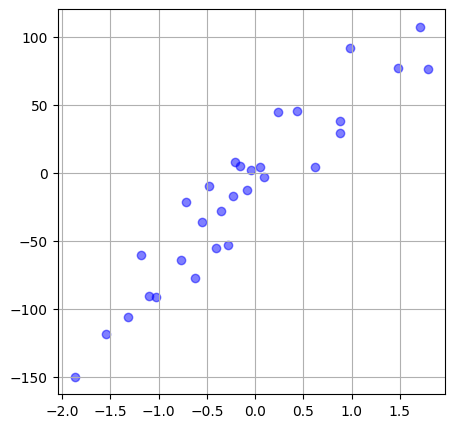

In [ ]:
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ランダム番号3、特徴量は1つ、ノイズ量20、30個のデータセットを作る
X, y = make_regression(
    random_state=3,
    n_features=1,
    noise=20,
    n_samples=30)

# 各列データ（X)で、データフレームを作り
df = pd.DataFrame(X)
# Ｘ軸に「特徴量0」、Y軸に「y」で散布図を描画
plt.figure(figsize=(5, 5))
plt.scatter(df[0], y, color="b", alpha=0.5)
plt.grid()
plt.show()

データを使って学習させる： リスト4.2

正解率: 84.98344774428922 %


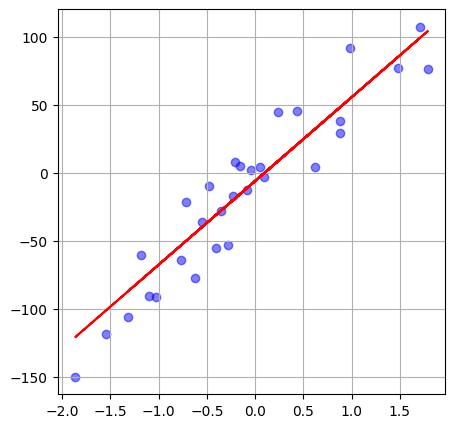

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# 訓練データ、テストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 線形回帰の学習モデルを作る（訓練データで）
model = LinearRegression()
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = r2_score(y_test, pred)
print("正解率:", score*100, "%")

# 散布図上に予測の点をたくさん描いて線にする
plt.figure(figsize=(5, 5))
plt.scatter(X, y, color="b", alpha=0.5)
plt.plot(X, model.predict(X), color = 'red')
plt.grid()
plt.show()

ばらつきが多い場合で試す： リスト4.3

正解率: 33.025689869605145 %


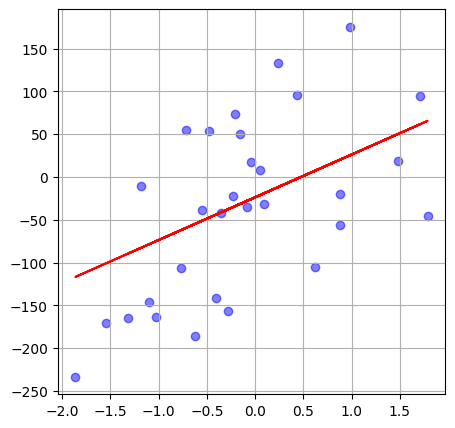

In [ ]:
# ノイズ80のデータだと、線の引き方も難しくなる
X, y = make_regression(
    random_state=3,
    n_samples=30,
    n_features=1,
    noise=80)

# 訓練データ、テストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 線形回帰の学習モデルを作る（訓練データで）
model = LinearRegression()
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = r2_score(y_test, pred)
print("正解率:", score*100, "%")

# 散布図上に予測の点をたくさん描いて線にする
plt.figure(figsize=(5, 5))
plt.scatter(X, y, color="b", alpha=0.5)
plt.plot(X, model.predict(X), color = 'red')
plt.grid()
plt.show()

# 13　分類：ロジスティック回帰

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 散布図に分類の様子を描画する
def plot_boundary(model, X, Y, target, xlabel, ylabel):
    cmap_dots = ListedColormap([ "#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap([ "#c6dcec", "#ffdec2", "#cae7ca"])
    plt.figure(figsize=(5, 5))
    if model:
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200))
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        plt.pcolormesh(XX, YY, pred, cmap=cmap_fills, shading="auto")
        plt.contour(XX, YY, pred, colors="gray")
    plt.scatter(X, Y, c=target, cmap=cmap_dots)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

2つに分類しやすいデータセットを自動生成する： リスト4.5

In [ ]:
from sklearn.datasets import make_blobs

# ランダム番号0、特徴量は2つ、塊数は2、ばらつき1、300個のデータセットを作る
X, y = make_blobs(
    random_state=0,
    n_features=2,
    centers=2,
    cluster_std=1,
    n_samples=300)

df = pd.DataFrame(X)
print(df.head())
print(y)

          0         1
0  3.359415  5.248267
1  2.931100  0.782556
2  1.120314  5.758061
3  2.876853  0.902956
4  1.666088  5.605634
[0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1
 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1
 0 1 1 0]


データを散布図で描画: リスト4.6

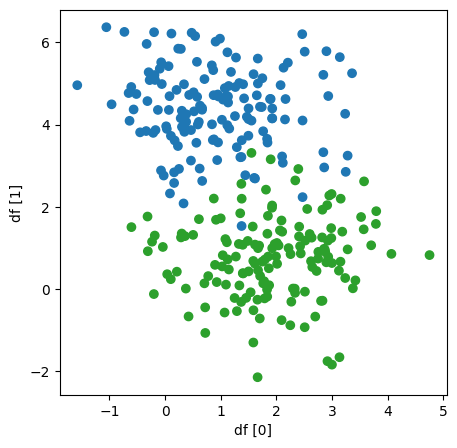

In [ ]:
plot_boundary(None, df[0], df[1], y, "df [0]", "df [1]")

このデータで学習を行い、分類の様子を表示： リスト4.7

正解率: 96.0 %


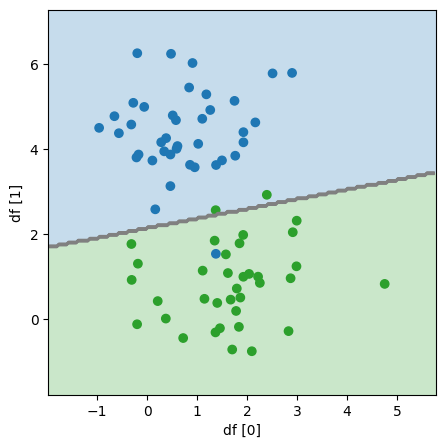

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 訓練データ、テストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# ロジスティック回帰の学習モデルを作る（訓練データで）
model = LogisticRegression()
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の様子を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")


3つに分類する場合を試す： リスト4.8

正解率: 82.66666666666667 %


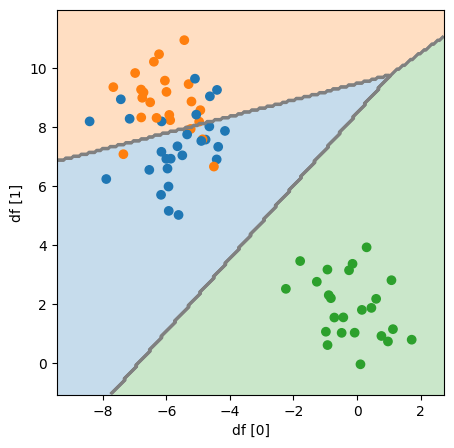

In [ ]:
# ランダム番号5、特徴量は2つ、塊数は3、ばらつき1、300個のデータセットを作る
X, y = make_blobs(
    random_state=5,
    n_features=2,
    centers=3,
    cluster_std=1,
    n_samples=300)

# 訓練データ、テストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# ロジスティック回帰の学習モデルを作る（訓練データで）
model = LogisticRegression()
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の様子を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")


シグモイド関数をグラフ化： リスト4.9

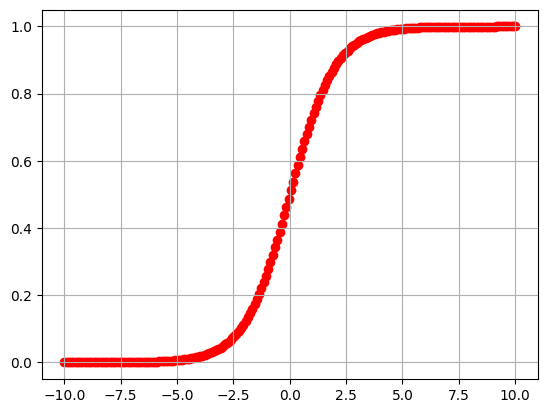

In [ ]:
# xの値（-10〜10を200個に分割）
xx = np.linspace(-10, 10, 200)

#　シグモイド関数
yy = 1 / (1 + np.exp(-xx))

plt.scatter(xx, yy, color="r")
plt.grid()
plt.show()

# 14　分類：SVM（サポートベクターマシン）

SVMで学習を行い、分類の状態を描画： リスト4.10

正解率: 89.60000000000001 %


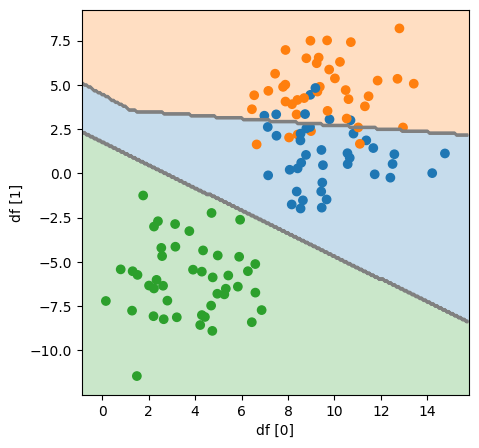

In [ ]:
from sklearn import svm

# ランダム番号4、特徴量は2つ、塊数は3、ばらつき2、500個のデータセットを作る
X, y = make_blobs(
    random_state=4,
    n_features=2,
    centers=3,
    cluster_std=2,
    n_samples=500)

# 訓練データ、テストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 線形のSVMで学習モデルを作る（訓練データで）
model = svm.SVC(kernel="linear")
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の様子を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")


gamma=1に変更して試す： リスト4.11

正解率: 85.6 %


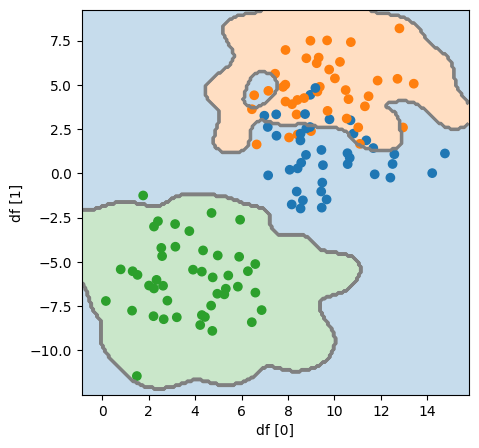

In [ ]:
# ガウスカーネル法のSVMで学習モデルを作る（訓練データで）
model = svm.SVC(kernel="rbf", gamma=1)
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の様子を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")


gamma=10に変更して試す： リスト4.12

正解率: 72.8 %


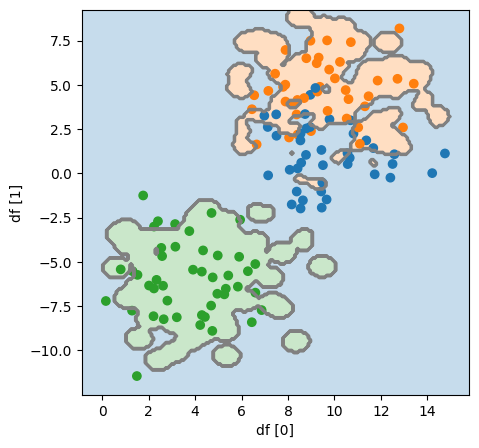

In [ ]:
# ガウスカーネル法のSVMで学習モデルを作る（訓練データで）
model = svm.SVC(kernel="rbf", gamma=10)
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の様子を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")


gamma=0.1に変更して試す： リスト4.13

正解率: 89.60000000000001 %


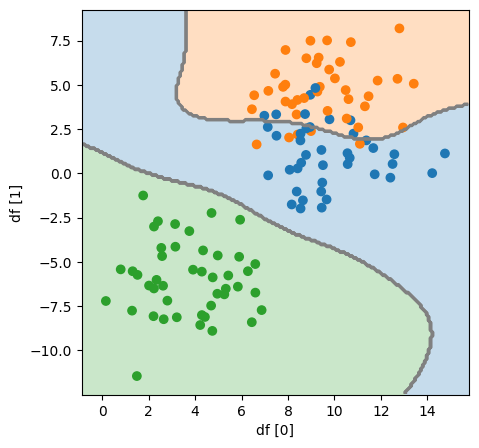

In [ ]:
# ガウスカーネル法のSVMで学習モデルを作る（訓練データで）
model = svm.SVC(kernel="rbf", gamma=0.1)
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の様子を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")


gamma="scale"に変更して試す： リスト4.14

正解率: 90.4 %


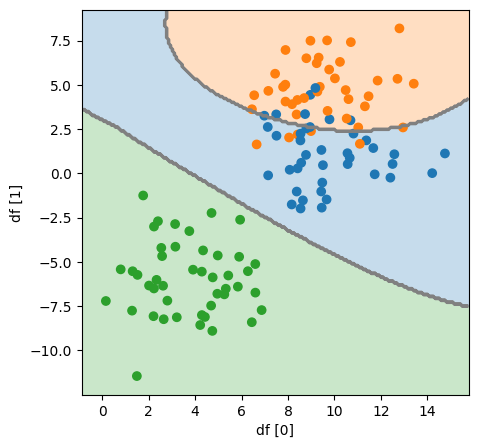

In [ ]:
# ガウスカーネル法のSVMで学習モデルを作る（訓練データで）
model = svm.SVC(kernel="rbf", gamma="scale")
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の様子を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")


# 15　分類：決定木

決定木で学習を行い、分類の状態を描画： リスト4.15

正解率: 96.0 %


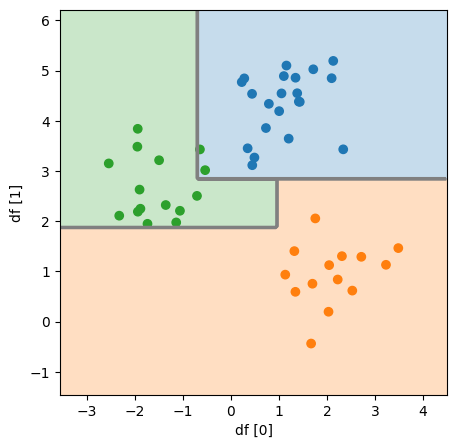

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# ランダム番号0、特徴量は2つ、塊数は3、ばらつき0.6、200個のデータセットを作る
X, y = make_blobs(
    random_state=0,
    n_features=2,
    centers=3,
    cluster_std=0.6,
    n_samples=200)

# 訓練データ、テストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 決定木の学習モデルを作る（訓練データで）
model = DecisionTreeClassifier(max_depth=None, random_state=0)
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の状態を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")


ツリー構造を描画： リスト4.16

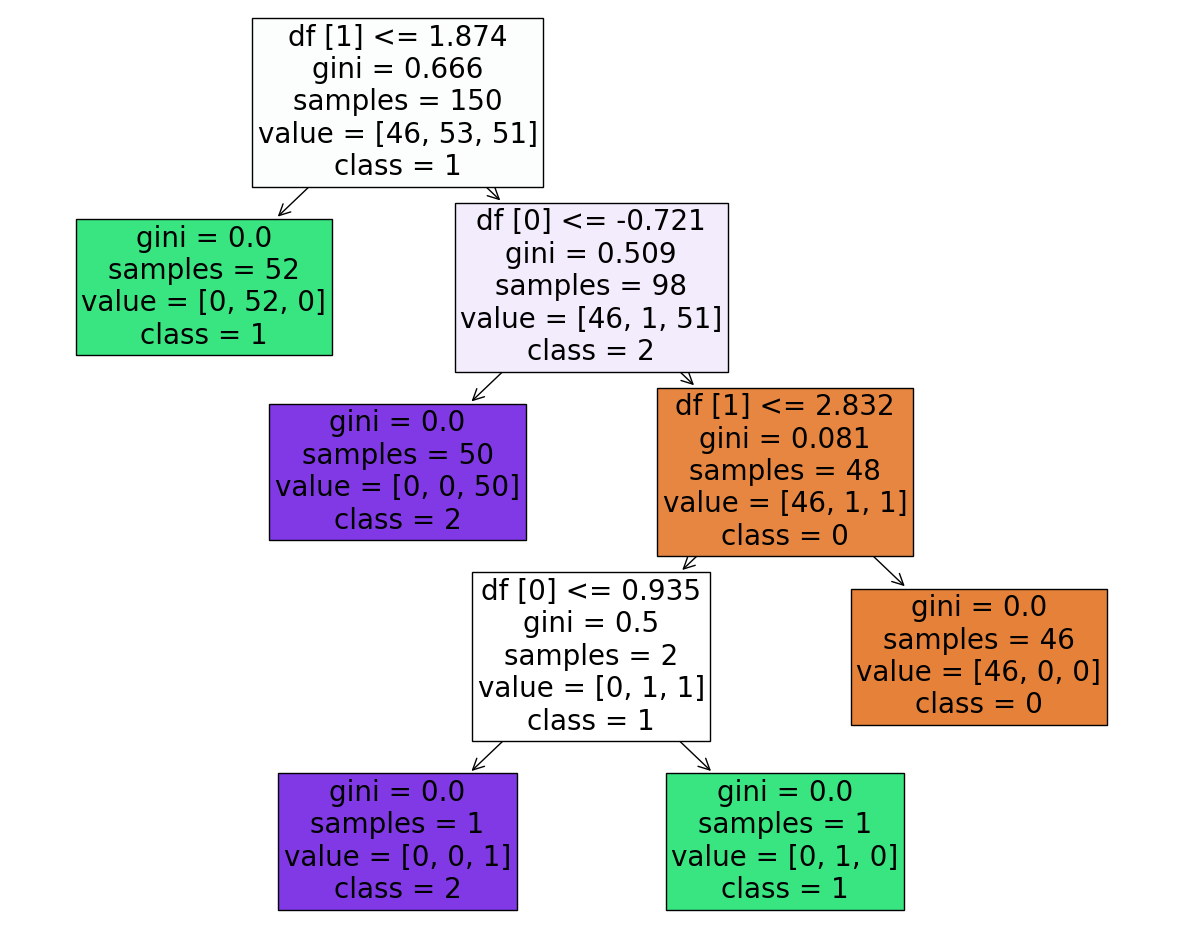

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 12))
plot_tree(model, fontsize=20, filled=True,
          feature_names=["df [0]", "df [1]"],
          class_names=["0","1","2"])
plt.show()

分岐の深度を最大2に変更して試す： リスト4.17

正解率: 92.0 %


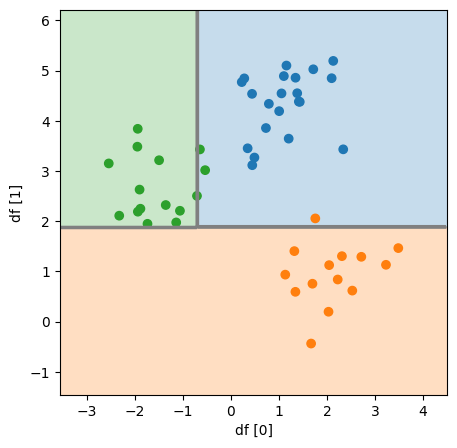

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 決定木の学習モデルを作る（訓練データで）
# 分岐の深度を最大2にすると、精度が少し下がるのがわかる
model = DecisionTreeClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の状態を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")


ツリー構造を描画： リスト4.18

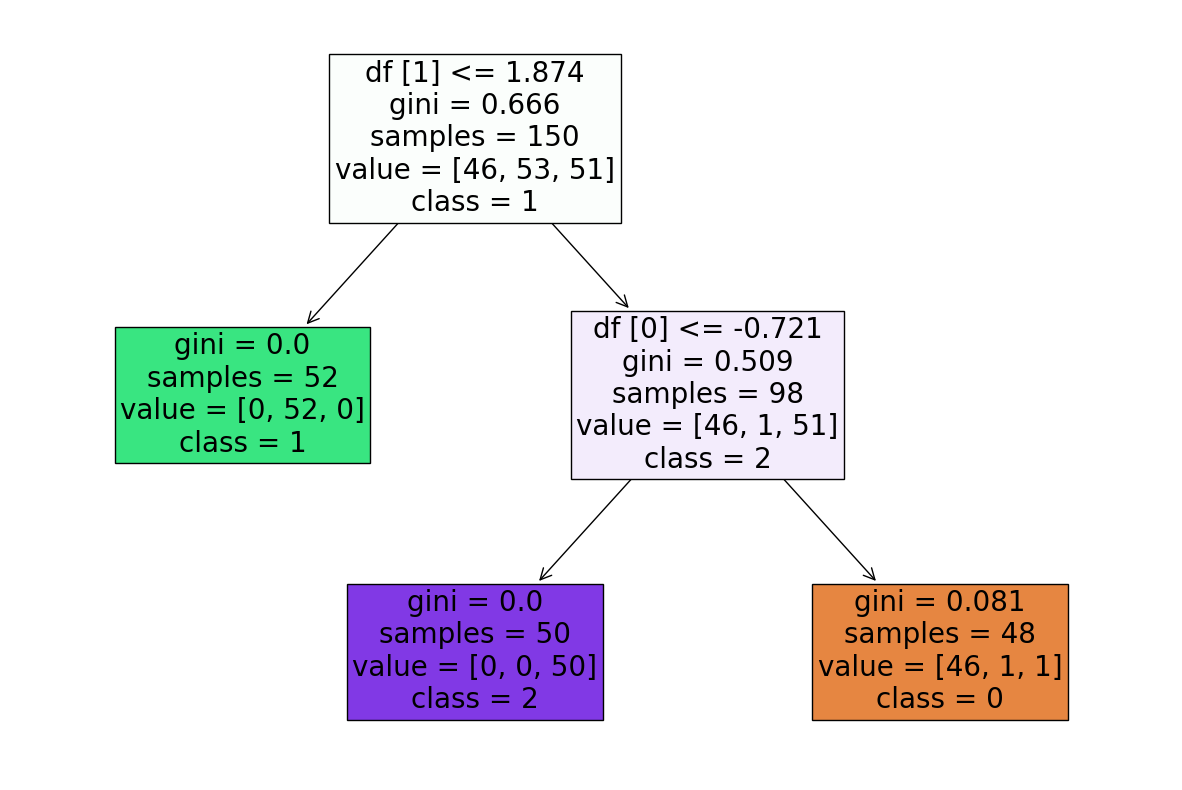

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(model, fontsize=20, filled=True,
          feature_names=["df [0]", "df [1]"],
          class_names=["0","1","2"])
plt.show()

## 16　分類：ランダムフォレスト

ランダムフォレストで学習を行い、分類の状態を描画： リスト4.19

正解率: 100.0 %


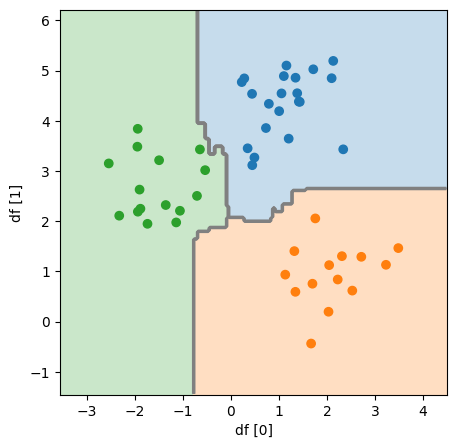

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# ランダムフォレストの学習モデルを作る（訓練データで）
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の状態を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")


## 17　分類：k-NN（k近傍法）

k-NNで学習を行い、分類の状態を描画： リスト4.20

正解率: 100.0 %


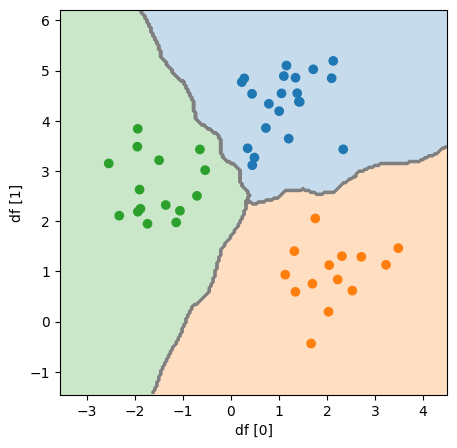

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# k近傍法の学習モデルを作る（訓練データで）
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の状態を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")


## 18　クラスタリング：k-means（k平均法）

k-meansで学習を行い、分類の状態を描画： リスト4.21

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


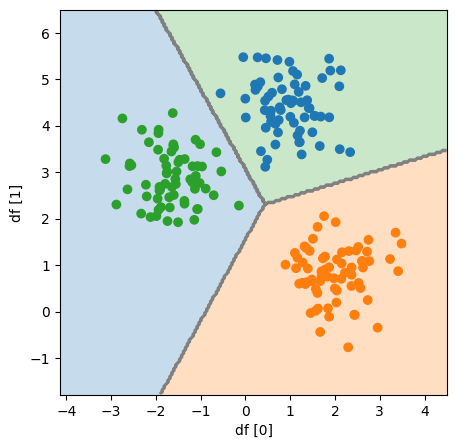

In [ ]:
from sklearn.cluster import KMeans

# k平均法の学習モデルを作る（3グループに分ける）
model = KMeans(n_clusters=3)
model.fit(X)

# この学習モデルの分類の状態を描画する（全データで）
df = pd.DataFrame(X)
plot_boundary(model, df[0], df[1], y, "df [0]", "df [1]")


2つにグループ分けをして試す： リスト4.22

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


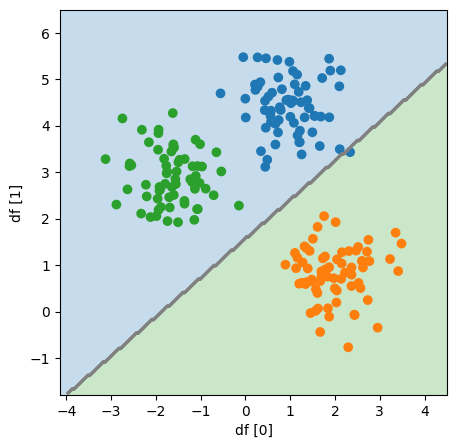

In [ ]:
# k平均法の学習モデルを作る（2グループに分ける）
model = KMeans(n_clusters=2)
model.fit(X)

# この学習モデルの分類の様子を描画する（全データで）
df = pd.DataFrame(X)
plot_boundary(model, df[0], df[1], y, "df [0]", "df [1]")
